**country:** The name of the country for which the data is reported <br>
**country_code:** The ISO country code <br>
**year:** The year for which the data is reported <br>
**gov_exp_pct_gdp:** Government expenditure on education as a percentage of GDP <br>
**lit_rate_adult_pct:** Literacy rate for adults (ages 15 and above) as a percentage of the population <br>
**pri_comp_rate_pct:** Primary completion rate as a percentage of the relevant age group <br>
**pupil_teacher_primary:** Pupil-teacher ratio at the primary education level <br>
**pupil_teacher_secondary:** Pupil-teacher ratio at the secondary education level <br>
**school_enrol_primary_pct:** Primary school enrollment rate as a percentage of the population <br>
**school_enrol_secondary_pct:** Secondary school enrollment rate as a percentage of the population <br>
**school_enrol_tertiary_pct:** Tertiary school enrollment rate as a percentage of the population  <br>

In [1]:
#pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# reading csv file
worldeducation = pd.read_csv('world-education-data.csv')
country_codes = pd.read_csv('all.csv')

In [4]:
worldeducation.head()

,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
0,Afghanistan,AFG,1999,NaN,NaN,NaN,33.18571,NaN,27.298849,NaN,NaN
1,Afghanistan,AFG,2000,NaN,NaN,NaN,NaN,NaN,22.162991,NaN,NaN
2,Afghanistan,AFG,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.47151,NaN
3,Afghanistan,AFG,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN
4,Afghanistan,AFG,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.07805,1.38107


In [5]:
country_codes.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [6]:
#Merge
worldeducation_with_regions = worldeducation.merge(
    country_codes[['alpha-3', 'region', 'sub-region']],
    left_on='country_code',   
    right_on='alpha-3',       
    how='left'                
)

#Dropping the alpha-3 column
worldeducation_with_regions.drop(columns=['alpha-3'], inplace=True)

#reordering 
column_order = ['country_code', 'region', 'sub-region'] + [col for col in worldeducation_with_regions.columns if col not in ['country_code', 'region', 'sub-region']]
worldeducation = worldeducation_with_regions[column_order]
worldeducation.head()


,country_code,region,sub-region,country,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
0,AFG,Asia,Southern Asia,Afghanistan,1999,NaN,NaN,NaN,33.18571,NaN,27.298849,NaN,NaN
1,AFG,Asia,Southern Asia,Afghanistan,2000,NaN,NaN,NaN,NaN,NaN,22.162991,NaN,NaN
2,AFG,Asia,Southern Asia,Afghanistan,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.47151,NaN
3,AFG,Asia,Southern Asia,Afghanistan,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN
4,AFG,Asia,Southern Asia,Afghanistan,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.07805,1.38107


In [7]:
#Show which country codes didnt match up
unmatched = worldeducation[~worldeducation['country_code'].isin(country_codes['alpha-3'])]

#Print out the unmatched values
print("Countries with unmatched country codes:")
print(unmatched[['country_code', 'country']]) 


Countries with unmatched country codes:
     country_code                      country
23            AFE  Africa Eastern and Southern
24            AFE  Africa Eastern and Southern
25            AFE  Africa Eastern and Southern
26            AFE  Africa Eastern and Southern
27            AFE  Africa Eastern and Southern
...           ...                          ...
5830          WLD                        World
5831          WLD                        World
5832          WLD                        World
5833          WLD                        World
5834          WLD                        World

[1198 rows x 2 columns]


In [8]:
#Drop rows in worldeducation where the country_code doesn't match any alpha-3 codes in country_codes
#Only dropping due to geographic regions don't have country codes, so they wont match up and aren't needed. 
worldeducation = worldeducation[worldeducation['country_code'].isin(country_codes['alpha-3'])]
worldeducation.head()


,country_code,region,sub-region,country,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
0,AFG,Asia,Southern Asia,Afghanistan,1999,NaN,NaN,NaN,33.18571,NaN,27.298849,NaN,NaN
1,AFG,Asia,Southern Asia,Afghanistan,2000,NaN,NaN,NaN,NaN,NaN,22.162991,NaN,NaN
2,AFG,Asia,Southern Asia,Afghanistan,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.47151,NaN
3,AFG,Asia,Southern Asia,Afghanistan,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN
4,AFG,Asia,Southern Asia,Afghanistan,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.07805,1.38107


In [9]:
#Missing Values in each Column
missing_values = worldeducation.isnull().sum()
total_rows = len(worldeducation)

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': (missing_values / total_rows) * 100
})

print(missing_summary)

                            Missing Values  Percentage
country_code                             0    0.000000
region                                   0    0.000000
sub-region                               0    0.000000
country                                  0    0.000000
year                                     0    0.000000
gov_exp_pct_gdp                       1179   25.117171
lit_rate_adult_pct                    3825   81.487005
pri_comp_rate_pct                     1434   30.549638
pupil_teacher_primary                 1938   41.286749
pupil_teacher_secondary               2592   55.219429
school_enrol_primary_pct               535   11.397529
school_enrol_secondary_pct            1137   24.222412
school_enrol_tertiary_pct             1472   31.359182


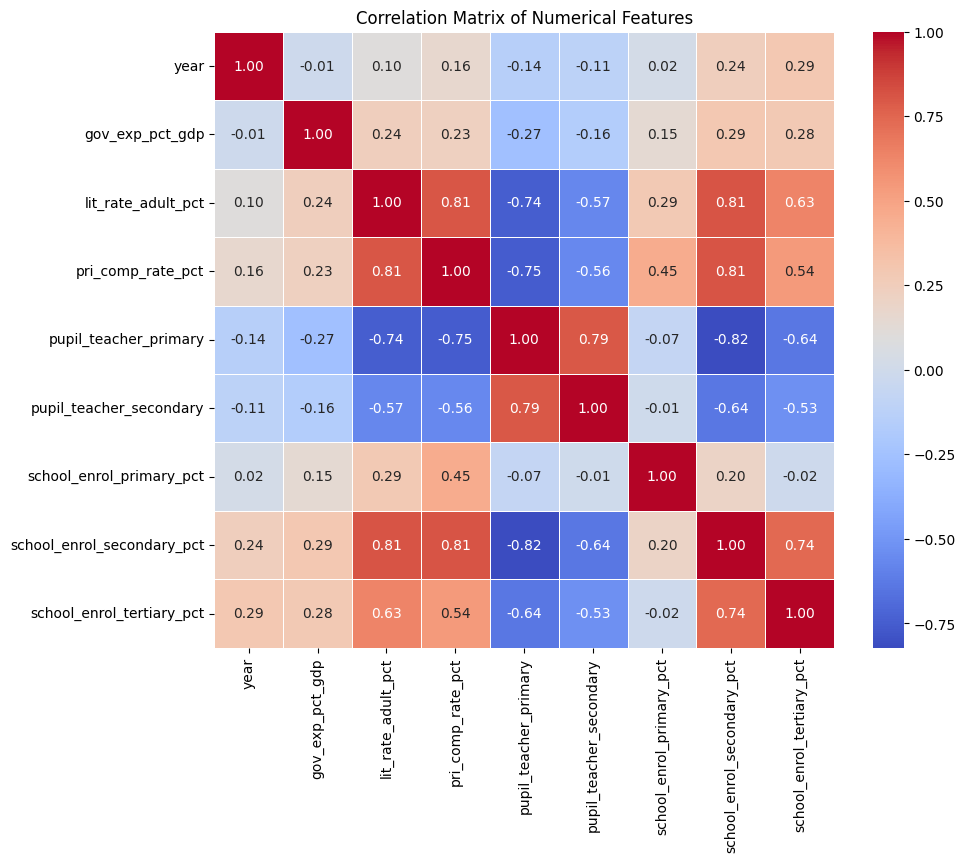

In [10]:
#Only use numerical columns/data
numerical_data = worldeducation.select_dtypes(include=['float64', 'int64'])

#Correlation Matrix
correlation_matrix = numerical_data.corr()

#plotting the matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# <b>Interpreting the Correlation Matrix</b> <br>
The correlation matrix shows the relationships between all numerical features in the World Education dataset. <br><br>

#### <b>Highly Positively Correlated with lit_rate_adult_pct:</b><br>

<ul>
<li>school_enrol_secondary_pct (0.878): Secondary school enrollment has the strongest correlated with literacy rates.</li> <br>
<li>pri_comp_rate_pct (0.858): Primary completion rates have the second strongest strong positive correlation with literacy rates</li> <br>
<li>school_enrol_tertiary_pct (0.730): Tertiary enrollment also shows a high correlation, the lowest out of the top three. </li><br><br>
</ul>

#### <b>Highly Negatively Correlated with lit_rate_adult_pct:</b><br>
<ul>
<li>pupil_teacher_primary (-0.818): A higher pupil-to-teacher ratio in primary education is the strongest negatively correlated with literacy rates.</li><br>
<li>pupil_teacher_secondary (-0.668): Secondary pupil-to-teacher ratio also shows a negative correlation, but not as much as primary education.</li><br><br>
</ul>

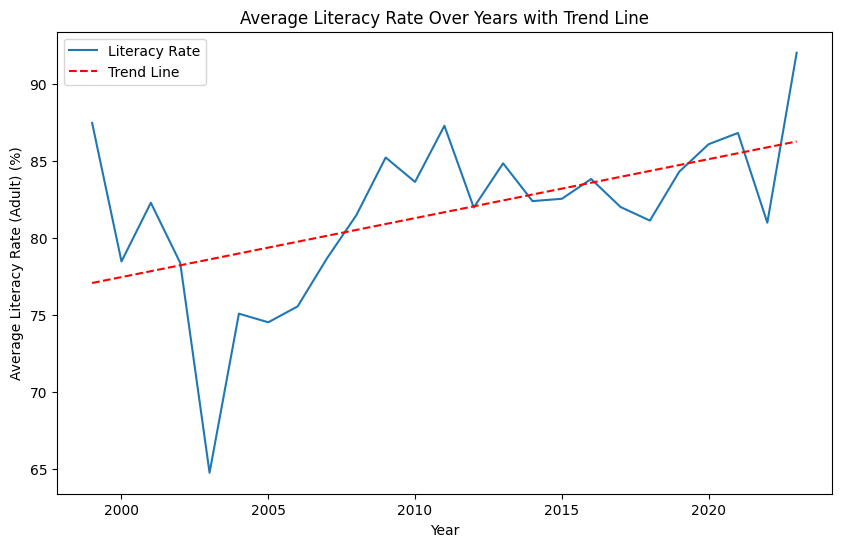

In [11]:
import numpy as np

# Aggregate data by year
yearly_trends = worldeducation.groupby('year')['lit_rate_adult_pct'].mean()

# Prepare data for regression
years = yearly_trends.index
lit_rates = yearly_trends.values

# Fit a linear regression line
coefficients = np.polyfit(years, lit_rates, 1)  # 1st degree polynomial (linear)
trend_line = np.poly1d(coefficients)

# Plot literacy trends with trend line
plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=lit_rates, label='Literacy Rate')
plt.plot(years, trend_line(years), color='red', linestyle='--', label='Trend Line')

# Add labels and title
plt.title('Average Literacy Rate Over Years with Trend Line')
plt.xlabel('Year')
plt.ylabel('Average Literacy Rate (Adult) (%)')
plt.legend()
plt.show()

# <b>Why is there such a big dip from 2001 to 2003?</b> <br>

In [12]:
#new dataframe for just 2001-2003
dip_years = worldeducation[(worldeducation['year'] >= 2001) & (worldeducation['year'] <= 2003)]

#finding missing literacy rate data
missing_data = dip_years['lit_rate_adult_pct'].isnull().sum()
print(f"Missing Literacy Rate Entries (2001-2003): {missing_data}")

#number of countries reporting literacy rate data during the dip years
countries_reporting = dip_years.groupby('year')['lit_rate_adult_pct'].count()
print("Countries Reporting Literacy Data (2001-2003):")
print(countries_reporting)

Missing Literacy Rate Entries (2001-2003): 498
Countries Reporting Literacy Data (2001-2003):
year
2001    32
2002    19
2003    12
Name: lit_rate_adult_pct, dtype: int64


In [13]:
#missing data during the dip years
missing_data_dip = dip_years.isnull().sum()
total_rows_dip = len(dip_years)  # Total number of rows in the dip years
missing_percentage_dip = (missing_data_dip / total_rows_dip) * 100

#combine missing data count and percentage
missing_data_dip_summary = pd.DataFrame({
    'Missing Count': missing_data_dip,
    'Missing Percentage': missing_percentage_dip
})

print("Missing Data (2001-2003):\n", missing_data_dip_summary)

Missing Data (2001-2003):
                             Missing Count  Missing Percentage
country_code                            0            0.000000
region                                  0            0.000000
sub-region                              0            0.000000
country                                 0            0.000000
year                                    0            0.000000
gov_exp_pct_gdp                       190           33.868093
lit_rate_adult_pct                    498           88.770053
pri_comp_rate_pct                     187           33.333333
pupil_teacher_primary                 137           24.420677
pupil_teacher_secondary               238           42.424242
school_enrol_primary_pct               64           11.408200
school_enrol_secondary_pct            136           24.242424
school_enrol_tertiary_pct             195           34.759358


In [14]:
#list of countries in the dataset
all_countries = set(worldeducation['country'].unique())

#list of countries reporting literacy data during each dip year
countries_reporting_2001 = set(dip_years[dip_years['year'] == 2001]['country'].unique())
countries_reporting_2002 = set(dip_years[dip_years['year'] == 2002]['country'].unique())
countries_reporting_2003 = set(dip_years[dip_years['year'] == 2003]['country'].unique())

#countries not reporting in each dip year
not_reporting_2001 = all_countries - countries_reporting_2001
not_reporting_2002 = all_countries - countries_reporting_2002
not_reporting_2003 = all_countries - countries_reporting_2003

print("Countries Not Reporting Literacy Data in 2001:")
print(not_reporting_2001)

print("\nCountries Not Reporting Literacy Data in 2002:")
print(not_reporting_2002)

print("\nCountries Not Reporting Literacy Data in 2003:")
print(not_reporting_2003)

#countries not reporting data for all three years
not_reporting_all_three = all_countries - (countries_reporting_2001 & countries_reporting_2002 & countries_reporting_2003)
print("\nCountries Not Reporting Literacy Data in Any of the Dip Years (2001-2003):")
print(not_reporting_all_three)

Countries Not Reporting Literacy Data in 2001:
{'Somalia', 'South Sudan', 'Bahamas, The', 'Sint Maarten (Dutch part)', 'Jordan', 'Liechtenstein', 'Curacao', 'Chile', 'Liberia', 'Haiti', 'Guam', "Korea, Dem. People's Rep.", 'Comoros', 'Turkmenistan', 'American Samoa', 'Marshall Islands', 'New Caledonia', 'Puerto Rico', 'San Marino', 'Micronesia, Fed. Sts.', 'Andorra'}

Countries Not Reporting Literacy Data in 2002:
{'Somalia', 'Guinea-Bissau', 'New Caledonia', 'Honduras', 'South Sudan', 'Liechtenstein', 'Turkmenistan', 'Curacao', 'Gibraltar', 'Liberia', 'Haiti', 'Puerto Rico', 'Guam', 'American Samoa', 'Sint Maarten (Dutch part)', "Korea, Dem. People's Rep.", 'Micronesia, Fed. Sts.', 'Monaco'}

Countries Not Reporting Literacy Data in 2003:
{'Somalia', 'Guatemala', 'South Sudan', 'Bahamas, The', 'Sint Maarten (Dutch part)', 'Guinea-Bissau', 'Solomon Islands', 'Colombia', 'Curacao', 'Liberia', 'Guam', 'Suriname', "Korea, Dem. People's Rep.", 'Turkmenistan', 'Gibraltar', 'American Samoa',

In [18]:
dip_years.head()

,country_code,region,sub-region,country,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
2,AFG,Asia,Southern Asia,Afghanistan,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.471510,NaN
3,AFG,Asia,Southern Asia,Afghanistan,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN
4,AFG,Asia,Southern Asia,Afghanistan,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.078050,1.381070
75,ALB,Europe,Southern Europe,Albania,2001,3.4587,99.0,NaN,21.75244,16.96302,NaN,NaN,NaN
76,ALB,Europe,Southern Europe,Albania,2002,3.1178,NaN,NaN,NaN,NaN,110.338921,74.538918,16.389561


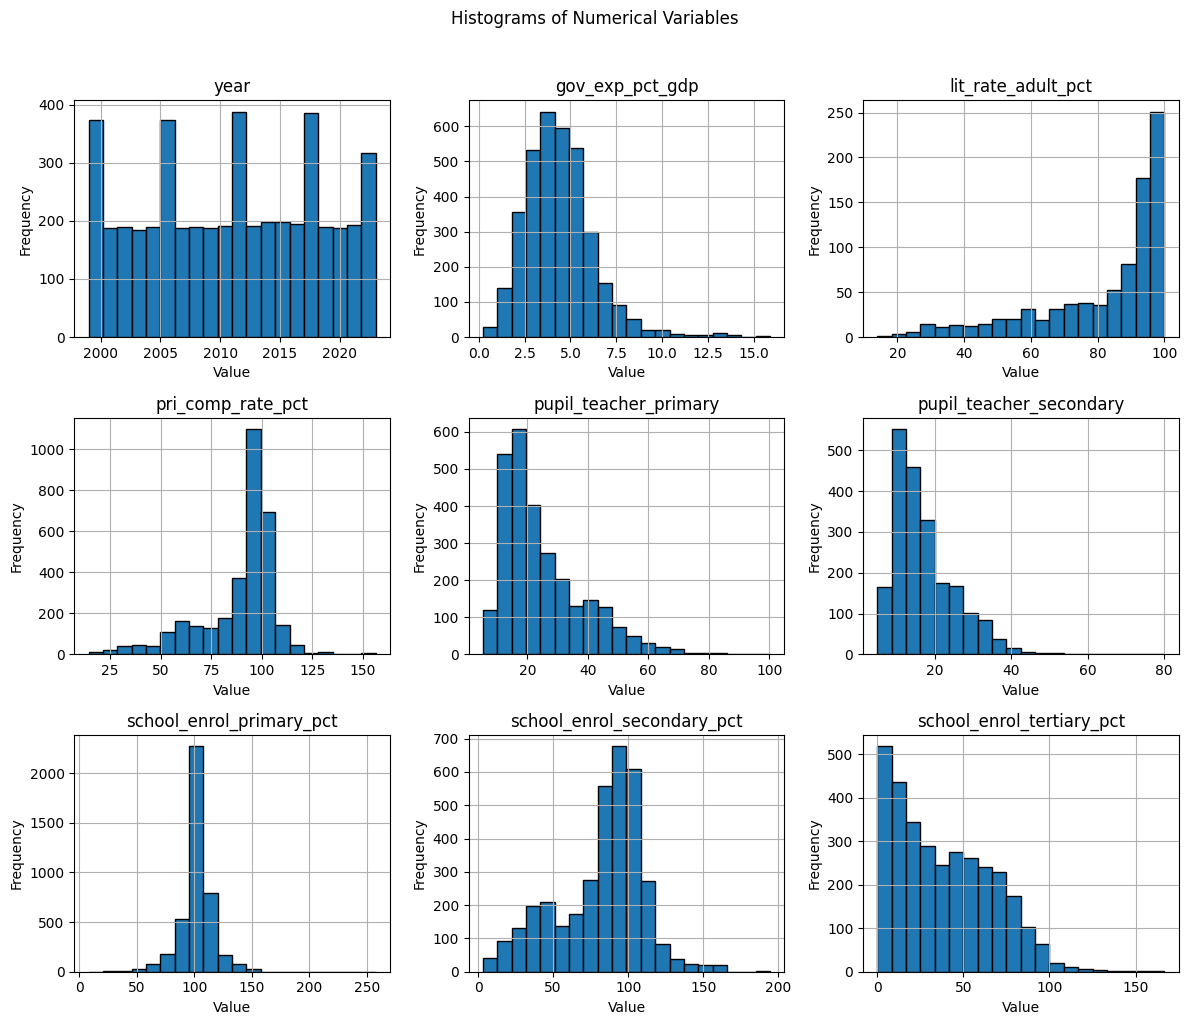

"\nFrom the histograms, we can infer the following about the dataset's numerical columns:\n\nyear:\n\nThis column appears to represent the time dimension of the dataset, with most data clustered in specific years (2000, 2005, 2010, 2015, 2020, etc.).\nSignificance: It's not directly meaningful for analysis but is essential for time-series trends or tracking changes over time.\ngov_exp_pct_gdp (Government Expenditure as % of GDP):\n\nThis distribution is slightly right-skewed, with most values concentrated between 2% and 10%. There are a few higher outliers.\nSignificance: It could be important when exploring correlations between government investment and literacy/education metrics.\nlit_rate_adult_pct (Adult Literacy Rate):\n\nThe distribution is strongly right-skewed, with many countries achieving near 100% literacy. There are a few with much lower literacy rates.\nSignificance: A critical column for analysis, especially since predicting missing literacy rates is your project goal.\np

In [16]:
# Plotting histograms
worldeducation.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Variables', y=1.02)

#axis labels
for ax in plt.gcf().axes:
    ax.set_xlabel('Value')  # X-axis label
    ax.set_ylabel('Frequency')  # Y-axis label

plt.tight_layout()
plt.show()

'''
From the histograms, we can infer the following about the dataset's numerical columns:

year:

This column appears to represent the time dimension of the dataset, with most data clustered in specific years (2000, 2005, 2010, 2015, 2020, etc.).
Significance: It's not directly meaningful for analysis but is essential for time-series trends or tracking changes over time.
gov_exp_pct_gdp (Government Expenditure as % of GDP):

This distribution is slightly right-skewed, with most values concentrated between 2% and 10%. There are a few higher outliers.
Significance: It could be important when exploring correlations between government investment and literacy/education metrics.
lit_rate_adult_pct (Adult Literacy Rate):

The distribution is strongly right-skewed, with many countries achieving near 100% literacy. There are a few with much lower literacy rates.
Significance: A critical column for analysis, especially since predicting missing literacy rates is your project goal.
pri_comp_rate_pct (Primary Completion Rate):

This is nearly normally distributed, with a peak around 80–100%.
Significance: Highly correlated with lit_rate_adult_pct (per your correlation matrix). Could be a significant predictor.
pupil_teacher_primary (Pupil-Teacher Ratio in Primary Education):

The distribution is right-skewed, with most values below 40. This indicates that smaller class sizes are more common.
Significance: Its negative correlation with literacy rates indicates that lower pupil-teacher ratios might improve literacy outcomes.
pupil_teacher_secondary (Pupil-Teacher Ratio in Secondary Education):

Similar to the primary ratio, but slightly more evenly distributed.
Significance: Could also influence literacy rates or school enrollment percentages.
school_enrol_primary_pct (Primary School Enrollment Rate):

This is sharply concentrated between 90% and 100%, indicating high enrollment levels in primary education.
Significance: Might be less variable and thus less useful as a predictor.
school_enrol_secondary_pct (Secondary School Enrollment Rate):

More evenly distributed, with a peak around 60–80%.
Significance: Strongly correlated with literacy rates. This could be a key predictor.
school_enrol_tertiary_pct (Tertiary School Enrollment Rate):

Heavily right-skewed, with most values below 50%. Indicates lower global participation in tertiary education.
Significance: Likely secondary to primary and secondary education but still relevant for advanced analysis.
Significant Columns to Discuss
lit_rate_adult_pct: Primary target for prediction.
pri_comp_rate_pct: A strong predictor, as it directly relates to foundational education levels.
school_enrol_secondary_pct: Another key predictor due to its strong correlation with literacy rates.
pupil_teacher_primary: Negative correlation with literacy suggests class size impacts literacy.
gov_exp_pct_gdp: May be worth exploring as a policy-level factor influencing education outcomes.

'''


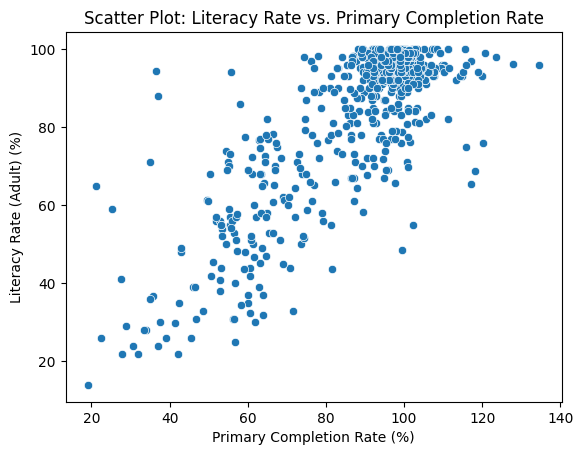

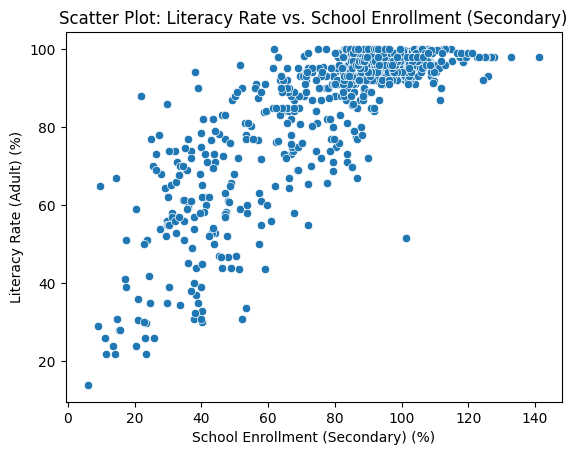

In [17]:
#Scatter Plot: Literacy rate vs. Primary Completion Rate
sns.scatterplot(x='pri_comp_rate_pct', y='lit_rate_adult_pct', data=worldeducation)
plt.title('Scatter Plot: Literacy Rate vs. Primary Completion Rate')
plt.xlabel('Primary Completion Rate (%)')
plt.ylabel('Literacy Rate (Adult) (%)')
plt.show()

#Scatter Plot: Literacy rate vs. School Enrollment (Secondary)
sns.scatterplot(x='school_enrol_secondary_pct', y='lit_rate_adult_pct', data=worldeducation)
plt.title('Scatter Plot: Literacy Rate vs. School Enrollment (Secondary)')
plt.xlabel('School Enrollment (Secondary) (%)')
plt.ylabel('Literacy Rate (Adult) (%)')
plt.show()
